# 株価の変化率を予測するモデル構築
このNotebookはコンペティションのチュートリアル2章をもとに作成してあります。
ファンダメンタルズ分析データの読み込み→特徴量の作成→LightGBMモデル学習→PKLファイル保存までを行います。
このNotebookはGoogle Colabratory環境で動作させました。

In [3]:
!pip install scikit-learn==0.20.3

     |████████████████████████████████| 5.4MB 8.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import pickle
import sys
import warnings

warnings.simplefilter('ignore')

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


workspace2/archive/src/predictor.pyにScoringServiceクラスを実装しており、このクラスが予測モデル構築及びモデルの保存を行います。

In [6]:
sys.path.append("/content/drive/MyDrive/JPX_Competition/workspace2/archive/src")

In [7]:
import predictor
from predictor import ScoringService as cls

In [8]:
# データセットをダウンロードして解凍したファイルを配置した場所を定義します。
# データ保存先ディレクトリ
DATASET_DIR= "/content/drive/MyDrive/JPX_Competition/data_dir"

In [9]:
# 読み込むファイルを定義します。
inputs = cls.get_inputs(DATASET_DIR)

In [10]:
inputs

{'stock_fin': '/content/drive/MyDrive/JPX_Competition/data_dir/stock_fin.csv.gz',
 'stock_labels': '/content/drive/MyDrive/JPX_Competition/data_dir/stock_labels.csv.gz',
 'stock_list': '/content/drive/MyDrive/JPX_Competition/data_dir/stock_list.csv.gz',
 'stock_price': '/content/drive/MyDrive/JPX_Competition/data_dir/stock_price.csv.gz'}

データの読み込み→特徴量作成→モデルをPKLファイルに保存をします

In [11]:
cls.train_and_save_model(inputs, model_path="/content/drive/MyDrive/JPX_Competition/workspace2/archive/model")

label_high_20



Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[48]	train's rmse: 0.150104	valid's rmse: 0.139432
label_low_20



Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[13]	train's rmse: 0.0739963	valid's rmse: 0.0734714


In [12]:
cls.get_model(model_path="/content/drive/MyDrive/JPX_Competition/workspace2/archive/model")

True

In [13]:
ret = cls.predict(inputs)

+ get features for predict



+ prediction start


label_high_20
label_low_20



In [16]:
ret

'2020-02-07-1301,0.06266449431235034,-0.06521835244936285\n2020-05-12-1301,0.06978522413695927,-0.06329329385418347\n2020-08-07-1301,0.016932980260028006,-0.06633990600210461\n2020-11-06-1301,0.048304388917562585,-0.06055840181223754\n2020-02-05-1332,0.05723333694270322,-0.06830662793201243\n2020-05-20-1332,0.062431295426934506,-0.06301624987443544\n2020-08-03-1332,0.05077222715102513,-0.06487266608479618\n2020-11-05-1332,0.04445753866567614,-0.06254886645452676\n2020-02-03-1333,0.055248654502240244,-0.06329329385418347\n2020-05-14-1333,0.040334023815742706,-0.0669658346986608\n2020-08-03-1333,0.0318554097473748,-0.06443094722465474\n2020-11-02-1333,0.04152625674584355,-0.06195300222823313\n2020-01-31-1352,0.05734317073224661,-0.07040009377943843\n2020-05-15-1352,0.0565022708044452,-0.07040009377943843\n2020-07-30-1352,0.04278287297839696,-0.07263474987314401\n2020-10-30-1352,0.046930694686584444,-0.06274651337750678\n2020-01-06-1376,0.033350903209368295,-0.06681439136604475\n2020-04-0

label_high_20
label_low_20


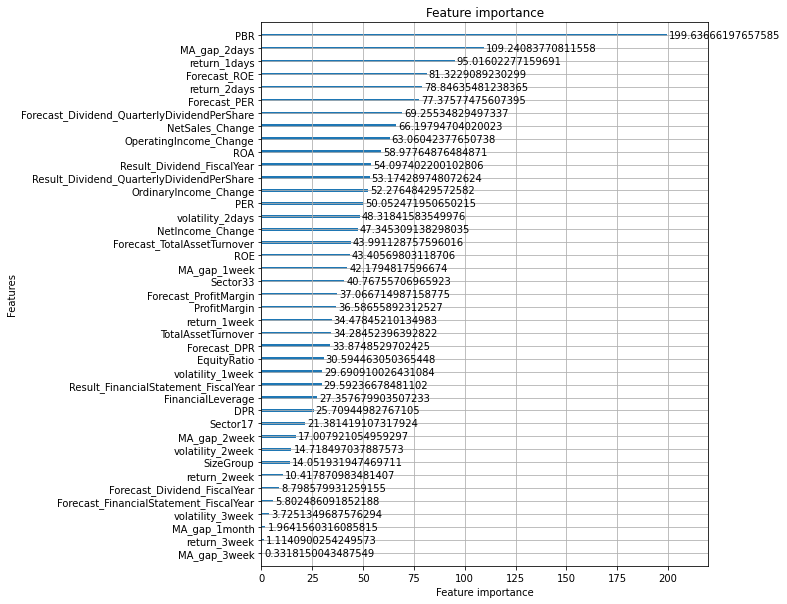

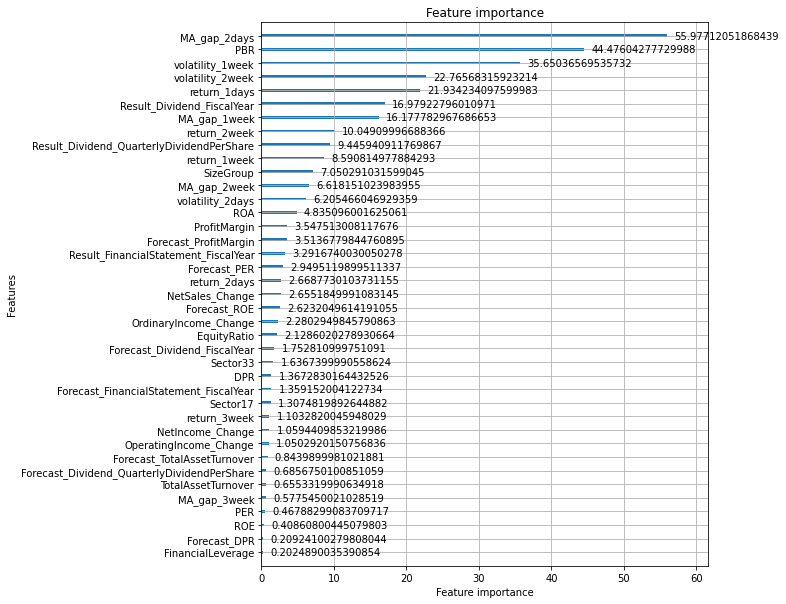

In [17]:
cls.plot_importance()